In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import utils


In [2]:
import sys
sys.executable

'/opt/conda/envs/p312/bin/python'

In [3]:
model = 'gemini'
locale = 'es'

In [4]:
ESCI_DATASET_ROOT = '/usr/local/google/home/raulramos/projects/esci-data'

dgt = utils.load_examples(ESCI_DATASET_ROOT=ESCI_DATASET_ROOT, locale=locale)

In [5]:
q = pd.read_parquet(f'{model}/queries-{locale}.parquet')

In [6]:
p = pd.read_parquet(f'{model}/products-{locale}.parquet')

In [7]:
q.shape, p.shape

((15180, 2), (259973, 2))

In [8]:
qe = np.stack(q.embeddings.values)
pe = np.stack(p.embeddings.values)
qe.shape, pe.shape

((15180, 768), (259973, 768))

In [9]:
def get_dotp_closests_idxs(q_embedding,p_embeddings_matrix, topk=40):
    return np.argsort( p_embeddings_matrix.dot(q_embedding) )[-topk:][::-1]


In [30]:
def get_dotp_closests_idxs_restricted(query_id):

    query_id = qid
    q_embeddings = q.loc[query_id].embeddings

    prod_ids = dgt[dgt.query_id == query_id].product_id.values
    pq = p.loc[prod_ids]
    p_embeddings = np.stack(pq.embeddings.values)
    return list(pq.index[np.argsort(p_embeddings.dot(q_embeddings))[::-1]])


## select random query

In [10]:
qid = np.random.choice(q.index)
q.loc[qid]

query                                            sudadera guess
embeddings    [-0.050236132, 0.008841239, -0.033427663, -0.0...
Name: 98881, dtype: object

In [38]:
%%timeit
prod_ids = dgt[dgt.query_id == qid].product_id.values


364 μs ± 3.21 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [39]:
%%timeit
prod_ids = get_dotp_closests_idxs_restricted(qid)


695 μs ± 9.57 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [37]:
#prod_ids = dgt[dgt.query_id == qid].product_id.values
prod_ids = get_dotp_closests_idxs_restricted(qid)
prod_ids

['B07FKMBXC8',
 'B07Z85MD7D',
 'B07N65JCZ1',
 'B07D7QGRJW',
 'B07RQSFVVZ',
 'B081K1FMPH',
 'B07RL3GKF2',
 'B07TQMC6KG',
 'B07V7141CK',
 'B07V3TJV5T',
 'B07RM49KRC',
 'B07MQFPWPN',
 'B07RV4S6ZD',
 'B07RJYNY4C',
 'B07GWN8S3C',
 'B07RSYLMP9']

In [32]:
p.loc[prod_ids]

,product,embeddings
B07FKMBXC8,<TITLE>GUESS Sudadera M84Q08 K7ON0 JBLK M Negr...,"[-0.027357833, 0.058028497, 0.02717828, 0.0017..."
B07Z85MD7D,<TITLE>Guess O94A60 FL01H A996 - Sudadera con ...,"[-0.019992368, 0.029788049, 0.013032069, -0.00..."
B07N65JCZ1,<TITLE>Guess M92Q08 K6ZS0 Jared Sudadera Hombr...,"[-0.01652579, 0.05671167, 0.034548294, 0.00454..."
B07D7QGRJW,"<TITLE>Guess W83q21k7g20 Sudadera, Negro (Jet ...","[-0.03795362, 0.023713794, 0.025264135, -0.013..."
B07RQSFVVZ,"<TITLE>Guess W94Q72K68I0 Sudadera, Negro (Jet ...","[-0.022327296, 0.04194075, 0.031697597, -0.020..."
B081K1FMPH,<TITLE>Guess Alvar Cn Fleece Sudadera con Capu...,"[-0.03225505, 0.026888812, 0.014854317, 0.0216..."
B07RL3GKF2,"<TITLE>Guess Giulia Fleece Sudadera, Gris (Med...","[-0.03814244, 0.04164715, -0.00042274938, -0.0..."
B07TQMC6KG,<TITLE>Guess M93Q23 K6ZS0 Sudadera Hombre Red ...,"[-0.014460574, 0.05953961, 0.017886693, 0.0157..."
B07V7141CK,<TITLE>Guess M93Q33 K8S40 Sudadera Hombre Whit...,"[-0.02639148, 0.042331327, 0.005314218, -0.000..."
B07V3TJV5T,<TITLE>Guess M93Q33 K8S40 Sudadera Hombre Whit...,"[-0.028388493, 0.043206964, 0.0044925003, -0.0..."


In [33]:
qgt = dgt[dgt.query_id == qid].copy()
qgt['dotp_distance'] = np.stack(p.loc[qgt.product_id].embeddings).dot(q.loc[qid].embeddings)

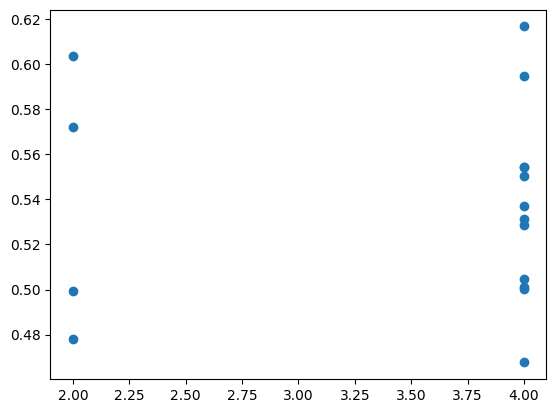

In [34]:
plt.scatter(qgt.relevance, qgt.dotp_distance)

## get closest product embeddings

In [35]:
#p_relevant = p.iloc[get_dotp_closests_idxs(q.loc[qid].embeddings, pe)].copy()
p_relevant = p.loc[get_dotp_closests_idxs_restricted(qid)].copy()

p_relevant['dotp_similarity'] = np.stack(p_relevant.embeddings).dot(q.loc[qid].embeddings)

In [36]:
print (f'query: {q.loc[qid].query}')
print ('\n------ text embeddings ranking (* indicates it is ground truth relevant)')
for i in range(len(p_relevant)):
    pi = p_relevant.iloc[i]
    print (f"{i:2d} {pi.name:10s} {'*' if pi.name in qgt.product_id.values else ' '} {pi.dotp_similarity:.4f} {pi['product'][:60].replace('\n',' ')\
                                                                                                           .replace('<TITLE>','')\
                                                                                                           .replace('</TITLE>','')}")
print ('\n------ ground truth relevant')
for _, gi in qgt[qgt.relevance==4].sort_values(by='dotp_distance', ascending=False).iloc[:10].iterrows():
    print (f'{gi.product_id} {gi.dotp_distance:.4f} {gi.product_title[:60]}')
    


query: sudadera guess

------ text embeddings ranking (* indicates it is ground truth relevant)
 0 B07FKMBXC8 * 0.6167 GUESS Sudadera M84Q08 K7ON0 JBLK M Negro <DES
 1 B07Z85MD7D * 0.6034 Guess O94A60 FL01H A996 - Sudadera con capucha para m
 2 B07N65JCZ1 * 0.5945 Guess M92Q08 K6ZS0 Jared Sudadera Hombre Blue Navy L<
 3 B07D7QGRJW * 0.5722 Guess W83q21k7g20 Sudadera, Negro (Jet Black A996 Jbl
 4 B07RQSFVVZ * 0.5545 Guess W94Q72K68I0 Sudadera, Negro (Jet Black A996 Jbl
 5 B081K1FMPH * 0.5544 Guess Alvar Cn Fleece Sudadera con Capucha, Bianco, S
 6 B07RL3GKF2 * 0.5503 Guess Giulia Fleece Sudadera, Gris (Medium Charcoal H
 7 B07TQMC6KG * 0.5371 Guess M93Q23 K6ZS0 Sudadera Hombre Red M <DES
 8 B07V7141CK * 0.5311 Guess M93Q33 K8S40 Sudadera Hombre White S <D
 9 B07V3TJV5T * 0.5288 Guess M93Q33 K8S40 Sudadera Hombre White M <D
10 B07RM49KRC * 0.5048 Guess Iconic Fleece Sudadera, Blanco (True White A000
11 B07MQFPWPN * 0.5013 guess jeans Hombre Sudaderas <DESCRIPTION>Fel
12 B07RV4S6ZD * 0.50

## show details of the top 3

In [20]:
print ('query:', q.loc[qid].query)

query: gravacion laser


In [25]:
for i in range(3):
    pi = p_relevant.iloc[i]
    print ('top', i+1, ':', pi.name)
    print (pi['product'])
    print ('---------')
    

top 1 : B0012M9HOA
<TITLE>Laser 2459 - Llave inglesa (100 mm)</TITLE>
<BULLETS>Marca láser</BULLETS>
<BRAND>Laser</BRAND>
---------
top 2 : B08TC354DX
<TITLE>Máquina de grabado láser de 1,6 W con soporte de enfoque automático, cortadora láser láser láser láser con funda plegable y soporte eléctrico automático</TITLE>
<DESCRIPTION><p>Especificaciones: </p><p>Tamaño base: 65 x 61 x 53 mm. </p><p>Tamaño del traje: 23 x 19 x 18,5 cm. </p><p>Peso: 190 g. </p><p>Peso del paquete: 2,4 kg. </p><p>Fuente de láser: 1500 MW 405 nm. Láser azul-violetter </p><p>Salida láser: 100 niveles ajustables. </p><p>Material: aluminio anodizado. </p><p>Color: gris. </p><p>Conexión de la aplicación: Bluetooth. </p><p>Formatos de archivo compatibles: JPG / BMP / PNG / G-Code </p><p>Compatible: iOS 10.0 + / Android 4.4 + </p><p>Windows 7/8/10/Vista / XP, Mac OS-10.10/11/12/13/14. </p><p>Conector de comunicación: Tipo C (5 V, 2 A) </p><p>Rango de temperatura de funcionamiento en Celsius: 0 65 – 65 ℃. </p><p>Rango

## show details of the bottom 3

In [26]:
for i in [-3,-2,-1]:
    pi = p_relevant.iloc[i]
    print ('bottom', i, ':', pi.name)
    print (pi['product'])
    print ('---------')
    

bottom -3 : B09G9C3BV2
<TITLE>Máquina de grabado láser, cortadora láser función de enfoque de diseño de protección para los ojos, grabadora láser DIY CNC para metal, madera, cuero, vinilo (A5 Pro 40W)</TITLE>
<DESCRIPTION><p>Especificaciones: </p><p>Modelo: ATOMSTACK A5 PRO 40W. </p><p>Tamaño: 410 x 400 mm. </p><p>Material de tallado: madera, bambú, cartón, plástico, cuero, placa de circuito, óxido de aluminio, revestimiento antirreflectante y metal lacado, cuchillo universal ennegrecido. </p><p>Material de corte: cartón, fieltro, chapa, acrílico, algunas placas de plástico delgadas. </p><p>Potencia del láser: 40 W. </p><p>Potencia óptica del láser: 5-5,5 W. </p><p>Longitud de onda láser: 455 ± 5 nm. </p><p>Precisión de grabado: 0,01 mm. </p><p>Método de enfoque: láser de enfoque fijo, enfoque libre. </p><p>Software operativo: LaserGRBL, LightBurn, compatible con Win XP / Win 7 / Win 8 / XP / Win 10. </p><p>Formatos de archivo compatibles: NC, BMP, JPG, PNG, DXF </p><p>Método de transf